# sanity checks on `models.NMF` with emulator

In [1]:
import numpy as np 
from provabgs import infer as Infer
from provabgs import models as Models

In [2]:
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# load NMF model and test the emulator without burst

In [3]:
m_nmf_fsps = Models.NMF(burst=False, emulator=False)
m_nmf_emul = Models.NMF(burst=False, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, gamma1_zh, gamma2_zh, dust1, dust2, dust_index
input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [4]:
# set prior
prior = Infer.load_priors([
    Infer.UniformPrior(7., 12.5, label='sed'),
    Infer.FlatDirichletPrior(4, label='sed'),   # flat dirichilet priors
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust1
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust2
    Infer.UniformPrior(-2., 1., label='sed')    # uniform priors on dust_index
])

In [6]:
test_theta = [prior.transform(prior.sample()) for i in range(10)]

(3000.0, 10000.0)

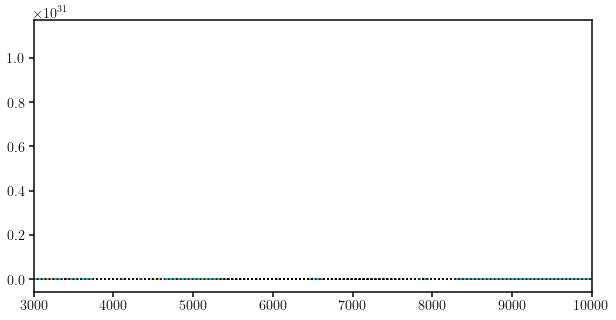

In [7]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for igal in range(10): 
    w, f = m_nmf_emul._sps_model(test_theta[igal], 0.1)
    sub.plot(w, f)
    w, f = m_nmf_fsps._sps_model(test_theta[igal], 0.1)
    sub.plot(w, f, c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [8]:
%timeit m_nmf_fsps._sps_model(test_theta[0], 0.1)

41.3 ms ± 282 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit m_nmf_emul._sps_model(test_theta[0], 0.1)

876 µs ± 56.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


(3000.0, 10000.0)

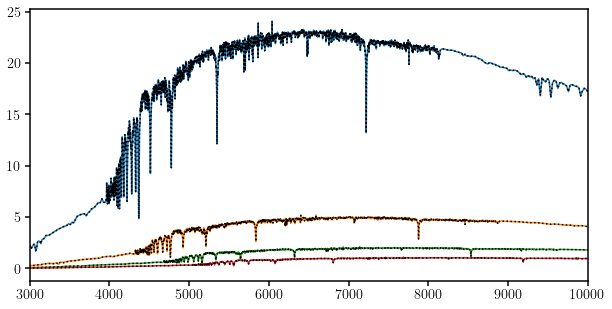

In [10]:
igal = 0

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for zred in [0.1, 0.2, 0.3, 0.4]: 
    w, f = m_nmf_emul.sed(test_theta[igal], zred)
    sub.plot(w, f)
    w, f = m_nmf_fsps.sed(test_theta[igal], zred)
    sub.plot(w, f, c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [14]:
%timeit m_nmf_fsps.sed(test_theta[igal], 0.1)

89.4 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit m_nmf_emul.sed(test_theta[igal], 0.1)

943 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# now with the burst component turned on

In [16]:
m_nmf_fsps = Models.NMF(burst=True, emulator=False)
m_nmf_emul = Models.NMF(burst=True, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index
input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [17]:
# set prior
prior = Infer.load_priors([
    Infer.UniformPrior(7., 12.5, label='sed'),
    Infer.FlatDirichletPrior(4, label='sed'),   # flat dirichilet priors
    Infer.UniformPrior(0., 1., label='sed'), # burst fraction
    Infer.UniformPrior(1e-2, 13.27, label='sed'), # tburst
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust1
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust2
    Infer.UniformPrior(-2., 1., label='sed')    # uniform priors on dust_index
])

In [18]:
test_theta = [prior.transform(prior.sample()) for i in range(10)]

(3000.0, 10000.0)

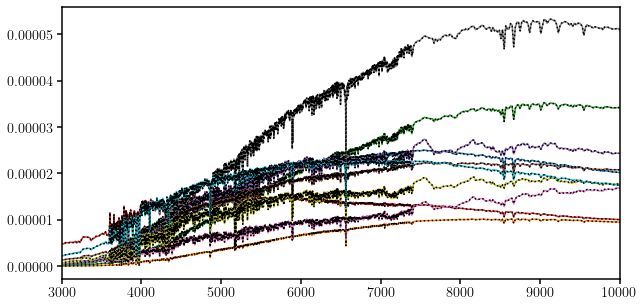

In [19]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for igal in range(10): 
    f = m_nmf_emul._emu_burst(test_theta[igal])
    sub.plot(m_nmf_emul._nmf_emu_waves, np.exp(f))
    w, f = m_nmf_fsps._fsps_burst(test_theta[igal])
    sub.plot(w, f, c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [30]:
%timeit m_nmf_fsps._fsps_burst(test_theta[1])

153 µs ± 4.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
%timeit m_nmf_emul._emu_burst(test_theta[1])

1.18 ms ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# lets try running the SED

(3000.0, 10000.0)

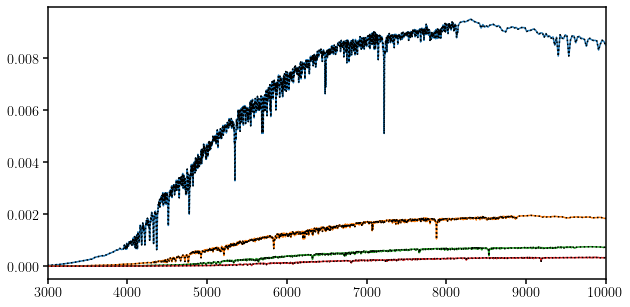

In [24]:
igal = 0
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for zred in [0.1, 0.2, 0.3, 0.4]: 
    w, f = m_nmf_emul.sed(test_theta[0], zred)
    sub.plot(w, f)
    w, f = m_nmf_fsps.sed(test_theta[0], zred)
    sub.plot(w, f, c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [28]:
%timeit m_nmf_fsps.sed(test_theta[1], 0.1)

90.2 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%timeit m_nmf_emul.sed(test_theta[1], 0.1)

968 µs ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


(6000, 7500)

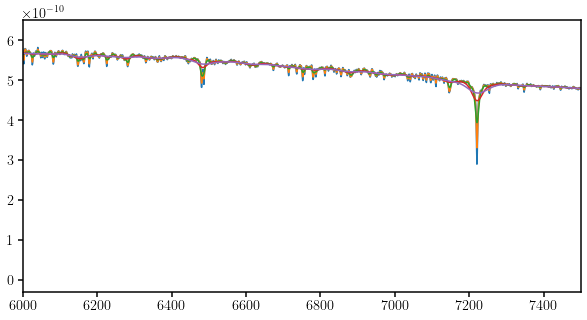

In [25]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for vdisp in [0., 50, 150, 500, 1000]: 
    _theta = np.array([0., 1., 0., 0., 0., 1., 10., 2e-4, 2e-4, 0., 0., 0.])
    w, f = m_nmf_emul.sed(_theta, 0.1, vdisp=vdisp)
    sub.plot(w, f)
sub.set_xlim(6000, 7500)